## Final Project - Stats 21
Blair L, Ryan T, Wesley B, Aryan S, William S

The first step is to import all of our packages necessary for the project, the datasets, and generally clean the data. In the documentation, it says that 0 is a valid rating only for the exposure data, but for some raters they rate 0 for multiple pictures which seems to demonstrate some error on the rating part. For that reason, we are going to clean 0s from both datasets and change them to be NaNs.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Reading in both dataframes
lightings = pd.read_excel("20201228 Perception of Attractiveness Raw Data.xlsx", sheet_name = 0)
exposures = pd.read_excel("20201228 Perception of Attractiveness Raw Data.xlsx", sheet_name = 1)

In [3]:
# Replacing 0s in the lightings dataset with NaNs
lightings.iloc[:, -60:] = lightings.iloc[:, -60:].replace(0, float("nan"))

In [4]:
# Replacing 0s in the exposures dataset with NaNs
exposures[exposures.columns[-60:]] = exposures[exposures.columns[-60:]].replace(0, float("nan"))

In [5]:
lightings.head()

,ResponseId,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,LocationLatitude,...,N3,N4,N5,N6,O1,O2,O3,O4,O5,O6
0,R_2QVUTvHQF2MIFRc,2020-08-10 20:57:02,2020-08-10 21:02:27,IP Address,100.14.1.231,100,324,True,2020-08-10 21:02:27.756,40.036407,...,8,8,8,7,7.0,7.0,7.0,7.0,7.0,7.0
1,R_sNA0Y7Wikfbjmoh,2020-08-10 14:26:38,2020-08-10 14:29:55,IP Address,100.7.25.54,100,196,True,2020-08-10 14:29:55.330,37.510895,...,6,6,7,7,4.0,6.0,7.0,7.0,7.0,5.0
2,R_3mjH4mWb8yz5oci,2020-08-10 20:06:48,2020-08-10 20:14:34,IP Address,103.104.49.153,100,465,True,2020-08-10 20:14:34.982,8.179001,...,7,6,7,6,5.0,6.0,4.0,4.0,4.0,4.0
3,R_1lsGctLd8WM6U9W,2020-08-10 18:18:03,2020-08-10 18:24:40,IP Address,103.110.237.214,100,397,True,2020-08-10 18:24:41.027,11.342804,...,9,10,10,9,5.0,7.0,5.0,6.0,6.0,6.0
4,R_3HztxfUfojAXTNT,2020-08-11 02:16:52,2020-08-11 02:21:06,IP Address,103.114.211.46,100,253,True,2020-08-11 02:21:06.996,11.007507,...,10,7,10,10,7.0,7.0,7.0,7.0,7.0,7.0


In [6]:
exposures.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,LocationLatitude,...,91,92,93,94,95,101,102,103,104,105
0,2020-11-07 12:04:28,2020-11-07 12:07:53,0,79.110.53.34,100,204,1,2020-11-07 12:07:53.825,R_3KZmLhM9GxlzOFm,36.168503,...,4.0,3.0,6.0,7.0,8.0,8.0,8.0,8.0,9.0,7.0
1,2020-11-07 12:04:40,2020-11-07 12:08:31,0,75.190.204.157,100,230,1,2020-11-07 12:08:31.316,R_BJTbzmzL62fahbz,35.401001,...,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0
2,2020-11-07 12:04:13,2020-11-07 12:08:40,0,24.167.162.47,100,266,1,2020-11-07 12:08:40.842,R_UxLAf8XxkoX6qBj,36.032196,...,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0
3,2020-11-07 12:05:01,2020-11-07 12:08:44,0,122.164.33.143,100,223,1,2020-11-07 12:08:44.983,R_2CwaqzLJonWy4zi,13.087799,...,1.0,2.0,4.0,4.0,4.0,4.0,7.0,6.0,6.0,6.0
4,2020-11-07 12:04:54,2020-11-07 12:08:55,0,103.66.79.87,100,241,1,2020-11-07 12:08:56.222,R_23fpZnxZtbx1clK,11.042007,...,3.0,3.0,4.0,4.0,3.0,6.0,10.0,9.0,7.0,7.0


### Hypothesis 1: Hypothesize that lighting condition 2 (box light) results in generally different (higher or lower) ratings

Our first hypothesis looked to compare the different lighting conditions and see which ones were preferred. Just skimming over the different lighting conditions, we hypothesized that box lighting would be the one most preferred.

In [7]:
# Changing the dataframe to have a row for every rating 
# instead of a row for every rater
lighting_df = pd.melt(lightings, 
                      id_vars = lightings.columns[:17],
                      value_vars = lightings.columns[17:],
                      var_name = "Participant_Lighting",
                      value_name = "Rating")
lighting_df["Participant"] = lighting_df["Participant_Lighting"].str[0]
lighting_df["Lighting"] = lighting_df["Participant_Lighting"].str[1:].astype(int)

lighting_df = lighting_df.drop(columns="Participant_Lighting")

# Removing invalid rows of ratings
lighting_df = lighting_df.dropna(subset = "Rating")
# Removing unused columns
lighting_df = lighting_df.drop(columns = ['IPAddress', 'StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'DistributionChannel', 'UserLanguage', 'Race_other'])

In [8]:
lighting_df.head()

,ResponseId,LocationLatitude,LocationLongitude,Age,Race,Sex,Rating,Participant,Lighting
0,R_2QVUTvHQF2MIFRc,40.036407,-75.221901,35,"East Asian,Other",Male,5.0,A,1
1,R_sNA0Y7Wikfbjmoh,37.510895,-77.642899,54,White,Male,4.0,A,1
2,R_3mjH4mWb8yz5oci,8.179001,77.432312,34,South Asian,Male,3.0,A,1
3,R_1lsGctLd8WM6U9W,11.342804,77.727386,33,South Asian,Male,5.0,A,1
4,R_3HztxfUfojAXTNT,11.007507,76.967102,29,South Asian,Male,7.0,A,1


In [9]:
Lighting_Types = ["Overhead", "Ring Light", "Box Light", "Camera Flash", "Two 45 Degrees Box Lights", "Natural Light"]

# Created a for loop that finds the mean and standard deviation for each lighting condition
for i in range(0, 6):
    lighting_columns = lightings.columns[range(17 + i, 77, 6)]
    mean_rate = lightings[lighting_columns].mean().mean()
    std_rate = lightings[lighting_columns].std().std()
    print(f"{Lighting_Types[i]}:")
    print(f"Mean Score: {mean_rate:.2f}")
    print(f"Standard Deviation: {std_rate:.2f}")
    print()

Overhead:
Mean Score: 5.27
Standard Deviation: 0.16

Ring Light:
Mean Score: 5.48
Standard Deviation: 0.10

Box Light:
Mean Score: 5.58
Standard Deviation: 0.17

Camera Flash:
Mean Score: 5.47
Standard Deviation: 0.19

Two 45 Degrees Box Lights:
Mean Score: 5.47
Standard Deviation: 0.17

Natural Light:
Mean Score: 5.42
Standard Deviation: 0.14



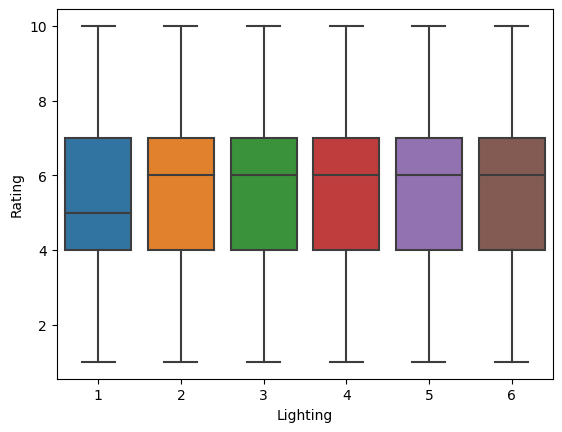

In [10]:
sns.boxplot(x = "Lighting", y = "Rating", data = lighting_df)
plt.show()

In [11]:
# Perform an ANOVA test to find significance variance between means
sample_lighting_groups = {
    'overhead': lightings[lightings.columns[range(17, 77, 6)]].values.flatten(),
    'ringlight': lightings[lightings.columns[range(17 + 1, 77, 6)]].values.flatten(),
    'boxlight': lightings[lightings.columns[range(17 + 2, 77, 6)]].values.flatten(),
    'cameraflash': lightings[lightings.columns[range(17 + 3, 77, 6)]].values.flatten(),
    'two45degreeboxlights': lightings[lightings.columns[range(17 + 4, 77, 6)]].values.flatten(),
    'naturallight': lightings[lightings.columns[range(17 + 5, 77, 6)]].values.flatten()
}

groups = {key: value[~np.isnan(value)] for key, value in sample_lighting_groups.items()}

f_statistic, p_value = stats.f_oneway(*groups.values())

# Print the results
print("F-Statistic:", f_statistic)
print("p-value:", p_value)

F-Statistic: 5.2361134565604255
p-value: 8.327531956126282e-05


Based on the ANOVA Test performed above, the variances between each group are significantly different. The p-value is less than an alpha level of 0.05, so there is a significant difference between each group.

Darker indicates more significant p-values. Any 0.00s are just so small they dont fit


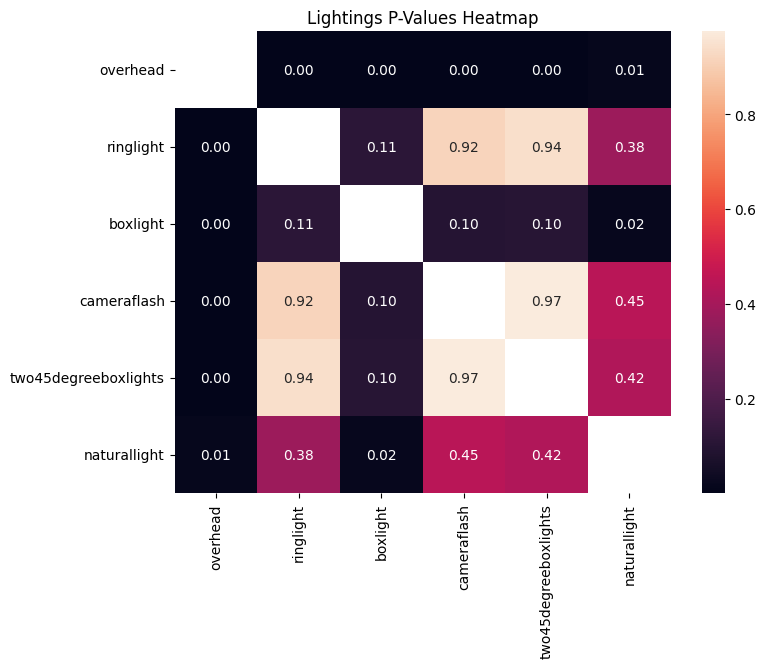

In [12]:
# Create an empty DataFrame to store the p-values
p_values_table = pd.DataFrame(index = sample_lighting_groups.keys(), columns = sample_lighting_groups.keys())

# Perform t-tests between sample groups
for group1_name, group1_values in sample_lighting_groups.items():
    for group2_name, group2_values in sample_lighting_groups.items():
        # Exclude self-comparisons
        if group1_name != group2_name:
            # drop nulls
            group1_values = group1_values[~pd.isnull(group1_values)]
            group2_values = group2_values[~pd.isnull(group2_values)]

            t_statistic, p_value = stats.ttest_ind(group1_values, group2_values, alternative='two-sided')
            p_values_table.loc[group1_name, group2_name] = p_value

light_p_values_df = pd.DataFrame(p_values_table.values, index=p_values_table.index, columns=p_values_table.columns)

# Print the p-values dataframe
print('Darker indicates more significant p-values. Any 0.00s are just so small they dont fit')

# Graphing
# Create a custom color map
# red shades for lower values
cmap = sns.cm.rocket  

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(light_p_values_df.astype(float), cmap=cmap, annot=True, fmt=".2f", cbar=True)
plt.title("Lightings P-Values Heatmap")
plt.show()

Observing the heatmap above, it appears that only boxlight has significant p-values. Thus, boxlight does appear to have generally different ratings than all of the other lighting conditions.

### Hypothesis 2: Exposure type 4 seems to result in generally more different ratings

Looking at exposures, we took many of the same steps to analyzing lighting conditions.

In [13]:
# Once again, changing each rating to have a row instead of each rater
exposure_df = pd.melt(exposures, 
                      id_vars=exposures.columns[:13], 
                      value_vars = exposures.columns[13:],
                      var_name='Participant_Exposure', 
                      value_name='Rating')

exposure_df["Participant_Exposure"] = exposure_df["Participant_Exposure"].astype("str")
exposure_df["Participant"] = exposure_df["Participant_Exposure"].str[0]
exposure_df["Exposure"] = exposure_df["Participant_Exposure"].str[-1]
exposure_df['Participant'] = exposure_df['Participant'].astype(int)
exposure_df['Exposure'] = exposure_df['Exposure'].astype(int)

# Drop all NaN values
exposure_df = exposure_df.dropna(subset = "Exposure")
#Remove unused columns
exposure_df = exposure_df.drop(columns=['IPAddress', 'StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'DistributionChannel', 'UserLanguage', 'Participant_Exposure'])

In [14]:
exposure_df.head()

,ResponseId,LocationLatitude,LocationLongitude,Rating,Participant,Exposure
0,R_3KZmLhM9GxlzOFm,36.168503,-115.116402,3.0,1,1
1,R_BJTbzmzL62fahbz,35.401001,-80.868797,2.0,1,1
2,R_UxLAf8XxkoX6qBj,36.032196,-79.858803,4.0,1,1
3,R_2CwaqzLJonWy4zi,13.087799,80.278503,5.0,1,1
4,R_23fpZnxZtbx1clK,11.042007,76.081512,5.0,1,1


In [15]:
exposure_types = ["fstop 8", "fstop 9", "fstop 11", "fstop 13", "fstop 16"]

for i in range(0, 5):
    exposure_columns = exposures.columns[range(13 + i, 63, 5)]
    mean_score = exposures[exposure_columns].mean().mean()
    std_score = exposures[exposure_columns].std().std()
    print(f"{exposure_types[i]}:")
    print(f"Mean Score: {mean_score:.2f}")
    print(f"Standard Deviation: {std_score:.2f}")
    print()

fstop 8:
Mean Score: 5.59
Standard Deviation: 0.12

fstop 9:
Mean Score: 5.63
Standard Deviation: 0.12

fstop 11:
Mean Score: 5.63
Standard Deviation: 0.14

fstop 13:
Mean Score: 5.61
Standard Deviation: 0.14

fstop 16:
Mean Score: 5.55
Standard Deviation: 0.16



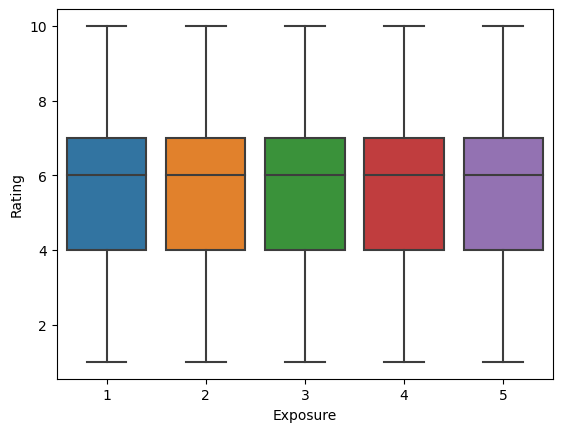

In [16]:
sns.boxplot(x = "Exposure", y = "Rating", data = exposure_df)
plt.show()

In [17]:
sample_exposure_groups = {
    'fstop8': exposures[exposures.columns[range(13, 63, 5)]].values.flatten(),
    'fstop9': exposures[exposures.columns[range(13 + 1, 63, 5)]].values.flatten(),
    'fstop11': exposures[exposures.columns[range(13 + 2, 63, 5)]].values.flatten(),
    'fstop13': exposures[exposures.columns[range(13 + 3, 63, 5)]].values.flatten(),
    'fstop16': exposures[exposures.columns[range(13 + 4, 63, 5)]].values.flatten(),
}

groups = {key: value[~np.isnan(value)] for key, value in sample_exposure_groups.items()}

f_statistic, p_value = stats.f_oneway(*groups.values())

# Print the results
print("F-Statistic:", f_statistic)
print("p-value:", p_value)

F-Statistic: 0.595744028412363
p-value: 0.66571426999344


Looking at exposures, the p-value is not significant, so it appears that the variance between the different groups is not significant. Even looking at the boxplots above, it does not appear to be a significant difference between each group.

Darker indicates more significant p-values.


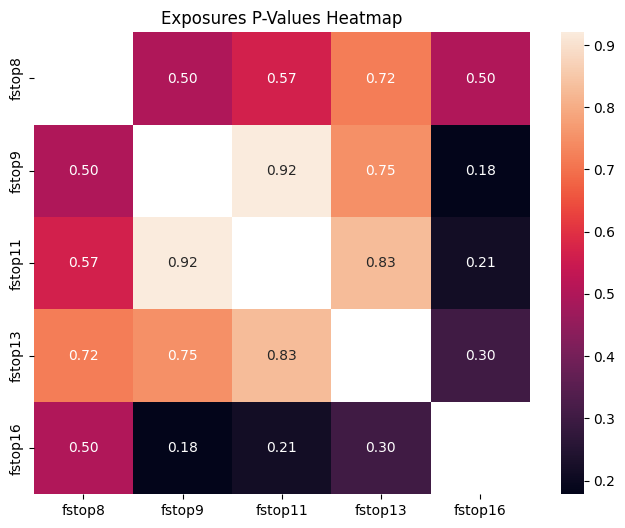

In [18]:
# Create an empty DataFrame to store the p-values
p_values_table = pd.DataFrame(index = sample_exposure_groups.keys(), columns = sample_exposure_groups.keys())

# Perform t-tests between sample groups
for group1_name, group1_values in sample_exposure_groups.items():
    for group2_name, group2_values in sample_exposure_groups.items():
        # Exclude self-comparisons
        if group1_name != group2_name:
            # drop nulls
            group1_values = group1_values[~pd.isnull(group1_values)]
            group2_values = group2_values[~pd.isnull(group2_values)]

            t_statistic, p_value = stats.ttest_ind(group1_values, group2_values, alternative='two-sided')
            p_values_table.loc[group1_name, group2_name] = p_value

exposure_p_values_df = pd.DataFrame(p_values_table.values, index=p_values_table.index, columns=p_values_table.columns)

# Print the p-values dataframe
print('Darker indicates more significant p-values.')

# Graphing
# Create a custom color map
# red shades for lower values
cmap = sns.cm.rocket  

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(exposure_p_values_df.astype(float), cmap=cmap, annot=True, fmt=".2f", cbar=True)
plt.title("Exposures P-Values Heatmap")
plt.show()

### Hypothesis 3: Women rate harsher than men

Another variable we were interested in was looking at different sexes and how they rate people. 

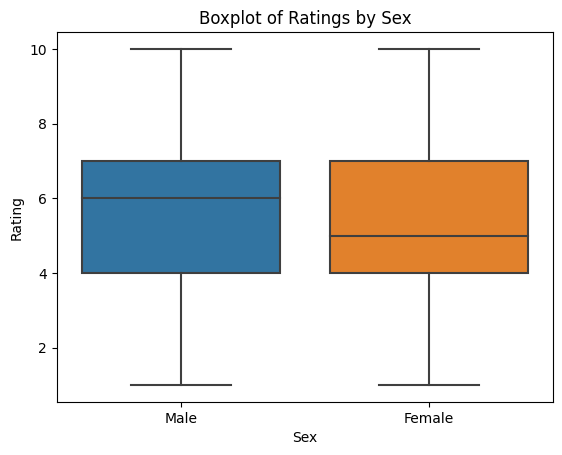

In [19]:
# Create side-by-side box plots
sns.boxplot(x = "Sex", y = "Rating", data = lighting_df)
plt.title("Boxplot of Ratings by Sex")
plt.xlabel("Sex")
plt.ylabel("Rating")
plt.show()

In [20]:
# Group data by sex
male = lighting_df[lighting_df["Sex"] == "Male"]["Rating"]
female = lighting_df[lighting_df["Sex"] == "Female"]["Rating"]

# Perform t-test
t_stat, p_value = stats.ttest_ind(male, female)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 5.218093572806616
P-value: 1.838550892647749e-07


Looking at the t test, the p-value seems to show a significant difference between the two means. It appears that there is a possibility that women rate harsher than men.

### Hypothesis 4: Younger people rate harsher than older people

In determining a threshold for what counts as a "young" person, we decided to just deem the median as the cut-off.

In [21]:
median = np.median(lightings["Age"])
print(median)

37.0


Everyone that is under 37 will be deemded as younger for our circumstances and everyone over 37 will be deemed as older.

In [22]:
# Find the old and young raters
young = lightings.loc[lightings["Age"] < 37]
old = lightings.loc[lightings["Age"] > 37]

# Drop unnecessary columns
young = young.drop(["Age", "ResponseId", "StartDate", "EndDate", "Status", "IPAddress", "Progress", "Duration (in seconds)", "Finished", "RecordedDate", "LocationLatitude", "LocationLongitude", "DistributionChannel", "UserLanguage", "Race", "Race_other", "Sex"], axis = 1)
old = old.drop(["Age", "ResponseId", "StartDate", "EndDate", "Status", "IPAddress", "Progress", "Duration (in seconds)", "Finished", "RecordedDate", "LocationLatitude", "LocationLongitude", "DistributionChannel", "UserLanguage", "Race", "Race_other", "Sex"], axis = 1)

# Find the mean of each rater
young_mean = young.mean(axis = 1)
old_mean = old.mean(axis = 1)

# Conduct t-tests between the ages
t_value, p_value = stats.ttest_ind(young_mean, old_mean)

print("The t-value: ", t_value)
print("The P-value: ", p_value)

The t-value:  1.7235940090834097
The P-value:  0.08639935570292896


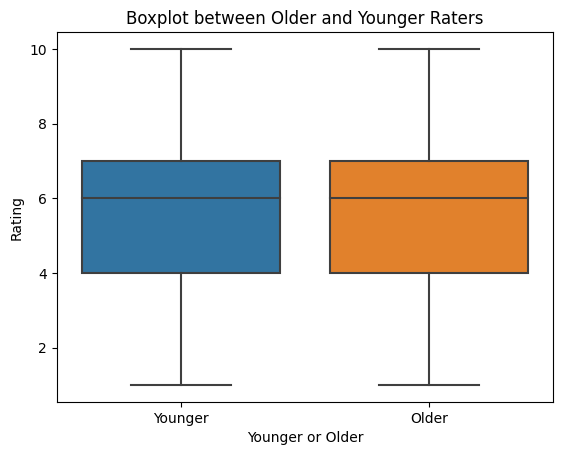

In [23]:
young["Rater Type"] = "Younger"
young_melt = pd.melt(young, id_vars = "Rater Type", var_name = "Rater", value_vars = young[:], value_name = "Rating")
old["Rater Type"] = "Older"
old_melt = pd.melt(old, id_vars = "Rater Type", var_name = "Rater", value_vars = old[:], value_name = "Rating")
combined = pd.concat([young_melt, old_melt])
sns.boxplot(x = "Rater Type", y = "Rating", data = combined)
plt.title("Boxplot between Older and Younger Raters")
plt.xlabel("Younger or Older")
plt.ylabel("Rating")
plt.show()

Based on the T-tests and the above box plot, it does not appear that there is a significant difference between younger and older raters. But we can go more in-depth.

In [24]:
participants = ["A", "B", "D", "G", "H", "I", "J", "K", "N", "O"]
young_raters = lightings.loc[lightings["Age"] < 37]
old_raters = lightings.loc[lightings["Age"] >= 37]
young_harsh_count = 0
rater_age_diff = []
for p in participants:
    for n in range(1, 7): #there are 6 different lighting types
        col = p + str(n)
        young_ratings = young_raters[col]
        old_ratings = old_raters[col]
        t_statistic, p_value = stats.ttest_ind(old_ratings, young_ratings)
        if p_value < 0.05 and young_ratings.mean() < old_ratings.mean():
            young_harsh_count += 1
        if p_value < 0.05:
            rater_age_diff.append(col)
print("In ", young_harsh_count / 60 * 100, "% of participant & lighting combinations, younger raters were statistically significantly harsher than older raters")

In  0.0 % of participant & lighting combinations, younger raters were statistically significantly harsher than older raters
